In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Results: transformed data takes 1 less dimension to hit 90%, 95%, 99% explained variance in PCA

Write out pca transformed data using transformed data
  - write pca with all (66) components
  - pca with 25 componenets (99% variance)

In [2]:
## Pretty variable display 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
df = pd.read_csv('../data/data_clean.csv', index_col=0)
df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, index=df.index, columns=df.columns)
df_scaled.head()

df_trans = pd.read_csv('../data/data_transformed.csv', index_col=0)
df_trans.head()

,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,PTS,REB,REB%,STL,TO RATIO,TOT MIN,TOV,TS%,USG%,MPG
A.C. Green 1996,-1.082598,-1.148129,-1.028967,-0.681084,-0.513359,1.288980,-1.522161,0.968055,-0.968067,-1.193614,...,-1.282815,1.259875,1.154570,-0.154308,-0.287875,1.108455,-1.351782,-0.225351,-1.482877,0.572197
Aaron McKie 1996,-0.143221,0.058256,0.484611,-0.441354,0.393632,-0.294746,-1.007992,-0.238253,0.238246,-1.212935,...,-1.059881,-0.425605,-0.448979,1.510795,0.880270,-0.182287,0.028874,-0.203836,-0.988627,-0.829306
Adam Keefe 1996,-1.223504,-1.173262,-1.037193,-0.171657,-0.385614,0.575005,-1.621040,1.143246,-1.143257,-1.522077,...,-1.179922,0.813718,1.004237,0.178713,1.756379,-1.231199,-0.395943,0.828880,-1.359314,-1.467881
Allan Houston 1996,1.742241,1.654202,-0.387341,-0.782970,0.010396,-1.086609,0.989357,-0.688742,0.688736,0.545307,...,0.517808,-1.070053,-1.025254,-1.319880,0.113675,1.385890,0.347487,-0.053232,0.576497,0.980079
Allen Iverson 1996,1.614754,1.698185,1.883025,-0.729031,0.891838,-1.164498,1.661732,-0.343367,0.343360,1.279518,...,1.426694,-0.970907,-1.000199,1.510795,0.588234,1.919990,2.683982,-0.440501,1.873902,1.904578


,%3PA,%3PM,%AST,%BLK,%BLKA,%DREB,%FGA,%FGA 2PT,%FGA 3PT,%FGM,...,PTS,REB,REB%,STL,TO RATIO,TOT MIN,TOV,TS%,USG%,MPG
A.C. Green 1996,-0.840618,-1.363567,-1.344493,-0.521402,-0.513359,1.239487,-1.522161,0.968055,-0.632785,-1.193614,...,-1.282815,1.227458,1.153921,-0.046262,-0.187566,1.108455,-1.497210,-0.225351,-1.482877,0.572197
Aaron McKie 1996,0.352398,0.502417,0.723903,-0.113651,0.393632,-0.131002,-1.007992,-0.238253,0.593066,-1.212935,...,-1.059881,-0.270499,-0.299084,1.436727,0.918612,-0.182287,0.149440,-0.203836,-0.988627,-0.829306
Adam Keefe 1996,-1.498759,-1.597072,-1.366520,0.219346,-0.385614,0.704624,-1.621040,1.143246,-1.447174,-1.522077,...,-1.179922,0.910379,1.048468,0.292941,1.598100,-1.231199,-0.290031,0.828880,-1.359314,-1.467881
Allan Houston 1996,1.069726,1.059925,-0.161214,-0.750828,0.010396,-1.208403,0.989357,-0.688742,0.781810,0.545307,...,0.517808,-1.216446,-1.132547,-1.494132,0.224540,1.385890,0.450403,-0.053232,0.576497,0.980079
Allen Iverson 1996,1.037802,1.070406,1.577596,-0.623697,0.891838,-1.341541,1.661732,-0.343367,0.641855,1.279518,...,1.426694,-1.045316,-1.089890,1.436727,0.666838,1.919990,2.161009,-0.440501,1.873902,1.904578


------------------
Original data


PCA()

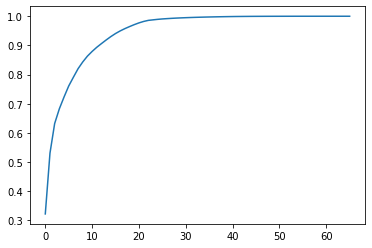

0: 0.3216370216483571
1: 0.5301582023518023
2: 0.6318349925187872
3: 0.6822893930017895
4: 0.7226976726705198
5: 0.7606008601150095
6: 0.7906952276858639
7: 0.8199933690735196
8: 0.8431728222874135
9: 0.8631760122577719
10: 0.8791868400280647
11: 0.8935649637443674
12: 0.9062346346605716
13: 0.9185555352522804
14: 0.9302003769153856
15: 0.9406947165547688
16: 0.9497055762851003
17: 0.9575414230906959
18: 0.964568734681985
19: 0.9712181846832639
20: 0.977185951914986
21: 0.9821196133660729
22: 0.9858117676111959
23: 0.987606271075795
24: 0.9893511534339743
25: 0.990737656736735
26: 0.9918202959135614
27: 0.9928044619900424
28: 0.9936720961186024
29: 0.9944049112899758
30: 0.9950623806247214
31: 0.995648083243
32: 0.9961826355962158
33: 0.9966409333070059
34: 0.9970775595866891
35: 0.997465375659109
36: 0.9978305080115318
37: 0.9981600595250598
38: 0.9984472996144571
39: 0.998713777574848
40: 0.998954237094315
41: 0.9991559806644595
42: 0.9993010516561333
43: 0.9994334168051834
44: 0.999

PCA()

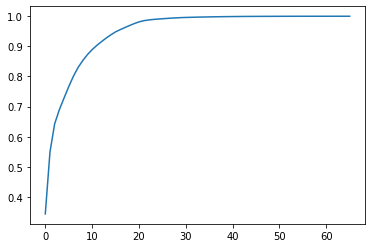

0: 0.34344963313591514
1: 0.5491138489714389
2: 0.6428406569993862
3: 0.6895104760962403
4: 0.7282273401729984
5: 0.7659668621642078
6: 0.8006242718841106
7: 0.8297726302499693
8: 0.852852889163994
9: 0.8725198034776399
10: 0.8890978132674914
11: 0.9030972001316079
12: 0.9156440423027444
13: 0.9274740322313978
14: 0.9382635610133959
15: 0.948044880260751
16: 0.9554741841996576
17: 0.9624924303788752
18: 0.9691696819473207
19: 0.9756289069348398
20: 0.9812012214450494
21: 0.9851460854353645
22: 0.9875298463107481
23: 0.9892768981632213
24: 0.990533129510677
25: 0.99173267865689
26: 0.9927745152601702
27: 0.9937892274023226
28: 0.9946375741974005
29: 0.995461662958338
30: 0.9959968334645096
31: 0.9964283675446388
32: 0.9968264790691631
33: 0.9971998473671903
34: 0.9975281016733937
35: 0.9978394397411763
36: 0.9981227386441427
37: 0.998374087844078
38: 0.998591266882275
39: 0.9987839057922251
40: 0.9989530268531475
41: 0.9991012463058078
42: 0.9992391087075153
43: 0.9993391931899813
44: 0

In [4]:

# pca = PCA(n_components=n_components)

## fit and investigate pca on original clean data
print('------------------\nOriginal data')
pca_og = PCA()
pca_og.fit(df_scaled)
cum_var_exp = pca_og.explained_variance_ratio_.cumsum()
plt.plot(cum_var_exp);
plt.show();

for n in range(len(cum_var_exp)):
    print(f'{n}: {cum_var_exp[n]}')
## results: 12 pc explain 90%, 17 95%, 25 99%    

print('\n\n------------------\nTransformed data')
pca_tr = PCA()
pca_tr.fit(df_trans)
cum_var_exp = pca_tr.explained_variance_ratio_.cumsum()
plt.plot(cum_var_exp)
plt.show()

for n in range(len(cum_var_exp)):
    print(f'{n}: {cum_var_exp[n]}')
## results: 11 90%, 16 95%, 24 99%


### Transformed can use 1 less dimension for same amount of explained variance

In [5]:
## save pca transformed data

pca_tr = PCA()
df_trans_pca = pca_tr.fit_transform(df_trans)
df_trans_pca = pd.DataFrame(df_trans_pca, index=df_trans.index, columns=[f'pca_{n}' for n in range(pca_tr.n_components_)])
df_trans_pca.to_csv('../data/data_pca66.csv')
df_trans_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_56,pca_57,pca_58,pca_59,pca_60,pca_61,pca_62,pca_63,pca_64,pca_65
A.C. Green 1996,5.029844,-2.835885,-0.414933,-0.492939,2.698017,1.061725,0.177164,1.374863,-3.067314,0.722753,...,-0.046990,-0.041319,0.037130,0.003410,0.016967,-0.022543,0.006452,-0.000023,-0.000138,0.000013
Aaron McKie 1996,-2.600083,-1.925555,-2.843974,-1.042675,0.603503,-2.175523,1.278706,1.525222,-0.095696,-0.974693,...,0.006462,-0.035185,0.018386,-0.001539,-0.001409,-0.003025,-0.006455,-0.003582,-0.000083,-0.000035
Adam Keefe 1996,6.500730,-3.015961,-1.444161,-0.124259,2.182097,-2.216806,-1.109648,2.042181,1.126785,1.171175,...,0.034093,0.010405,0.002657,-0.024417,0.019628,0.044234,-0.001828,-0.000151,-0.000046,0.000016
Allan Houston 1996,-4.164673,0.316982,1.997717,1.762263,-0.260672,0.949600,-1.450104,0.798079,0.174885,-2.881861,...,0.066355,-0.004708,0.014172,0.031375,0.007737,0.000034,-0.009210,0.000103,-0.000060,-0.000017
Allen Iverson 1996,-5.596375,6.694431,-1.742679,-0.492014,0.000180,-1.436437,0.073070,-1.072195,-1.250783,-1.487440,...,0.006910,0.002040,0.043323,-0.031700,0.000415,-0.039716,-0.011058,-0.000097,-0.000017,-0.000022


In [6]:
## save reduced data

pca_tr = PCA(n_components=0.99)
df_trans_pca = pca_tr.fit_transform(df_trans)
df_trans_pca = pd.DataFrame(df_trans_pca, index=df_trans.index, columns=[f'pca_{n}' for n in range(pca_tr.n_components_)])
df_trans_pca.to_csv('../data/data_pca24.csv')
df_trans_pca.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_15,pca_16,pca_17,pca_18,pca_19,pca_20,pca_21,pca_22,pca_23,pca_24
A.C. Green 1996,5.029844,-2.835885,-0.414933,-0.492939,2.698017,1.061725,0.177164,1.374863,-3.067314,0.722753,...,-0.884453,-1.010801,-0.207818,-0.547630,0.806682,1.022561,-0.047353,-0.147782,0.344499,0.132793
Aaron McKie 1996,-2.600083,-1.925555,-2.843974,-1.042675,0.603503,-2.175523,1.278706,1.525222,-0.095696,-0.974693,...,-0.524675,0.832122,-0.831046,1.482515,0.111291,0.396549,-0.026602,-0.085853,-0.093068,0.295314
Adam Keefe 1996,6.500730,-3.015961,-1.444161,-0.124259,2.182097,-2.216806,-1.109648,2.042181,1.126785,1.171175,...,-0.181963,-0.954723,-0.477892,0.178708,0.655030,-0.209013,-0.073784,-0.167154,-0.136384,-0.241275
Allan Houston 1996,-4.164673,0.316982,1.997717,1.762263,-0.260672,0.949600,-1.450104,0.798079,0.174885,-2.881861,...,-0.013648,0.288336,0.236808,-0.890745,0.178720,0.274665,0.264978,-0.034637,0.079247,-0.011079
Allen Iverson 1996,-5.596375,6.694431,-1.742679,-0.492014,0.000180,-1.436437,0.073070,-1.072195,-1.250783,-1.487440,...,0.047805,-0.166307,0.877110,-1.307260,1.175308,0.087891,-0.240083,-0.358132,-0.450089,0.058086
